# Compare RPKM

This notebook is used to compare the outputed rpkm outputed by the TE table notebooks contained in this folder (e.g. dmel_TE_table) with the RPKM values found from a seperate experiment on the same data. This allows one to make sure that the TE calulations in the notebook agree with previous calculations of TE to a reasonable degree. 

In [1]:
# Loading up required packages
import numpy as np
import pandas as pd
from statsmodels.nonparametric.smoothers_lowess import lowess
import warnings
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import csv

In [2]:
# Define the path to our Bam files
save_path = "/home/keeganfl/Desktop/Work_Fall_2021/data_tables/TE_tables/dmel/"
mutation = 'control'
samp_num = '3'
special = "fc"

In [3]:
#Loading in the RPKM data from Ethan Greenblatt's old project
data = pd.read_excel('/home/keeganfl/Downloads/aas9963-table-S4.xlsx', sheet_name=None)
data = data['Sheet1']

# Loading in the RPKM data from the TE tables created in plastid
te_table = pd.read_csv(save_path + mutation + '_' + samp_num + '_' + "te_table" + special + ".csv")

In [4]:
# extract the RPKM data for the ribosome profiling from Ethan's data table
ribo_data = data.iloc[list(range(len(data))),list(range(15))] 
ribo_data = ribo_data.iloc[2:-1]
ribo_data.columns = ribo_data.iloc[0]
ribo_data = ribo_data.iloc[1:-1]

In [5]:
# Merge the two dataframes together based on gene names
ribo_merged = pd.merge(te_table, ribo_data, how = 'inner', right_on = 'Symbol', left_on = 'gene_name')

(0.0, 5000.0)

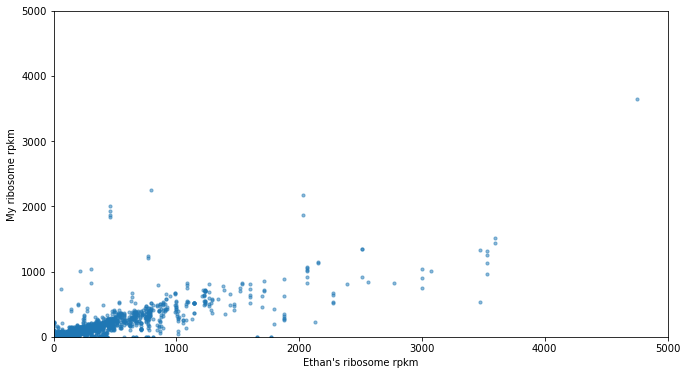

In [6]:
# plot the rpkm values observed from my data against those seen in Ethan's data to observe if there is a linear correlation
figure(figsize = (11,6))
plt.scatter(ribo_merged["GFP"],ribo_merged["ribosome_profiling_rpkm"], s = 10, alpha = 0.5)
plt.xlabel("Ethan's ribosome rpkm")
plt.ylabel("My ribosome rpkm")
plt.xlim([0,5000])
plt.ylim([0,5000])

In [7]:
# extract the RPKM data for the RNA sequencing from Ethan's data table
RNA_data = data.iloc[list(range(len(data))),[0,1,16,17,18,19,20,21,22,23,24,25,26]] 
RNA_data = RNA_data.iloc[2:-1]
RNA_data.columns = RNA_data.iloc[0]
RNA_data = RNA_data.iloc[1:-1]

In [8]:
# merge the two dataframes together based on gene name
RNA_merged = pd.merge(RNA_data, te_table, how = 'inner', left_on = 'Symbol', right_on = 'gene_name')

(0.0, 5000.0)

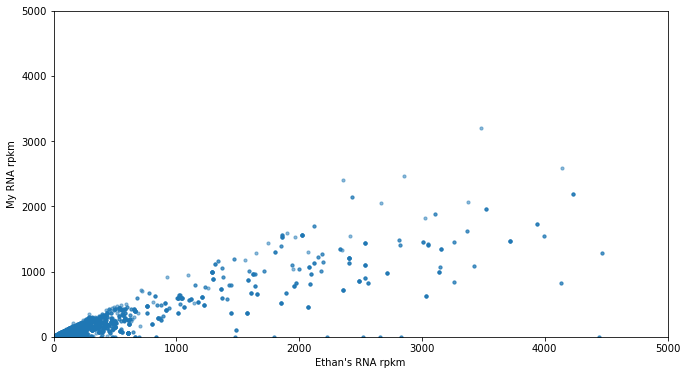

In [9]:
# plot the rpkm values observed from my data against those seen in Ethan's data to observe if there is a linear correlation
figure(figsize = (11,6))
plt.scatter(RNA_merged["mCherry_b"],RNA_merged["RNA-seq_rpkm"], s = 10, alpha = 0.5)
plt.xlabel("Ethan's RNA rpkm")
plt.ylabel("My RNA rpkm")
plt.xlim([0,5000])
plt.ylim([0,5000])

In [10]:
# Save output as a data table so that the RPKM values can be easily compared in the future. 
for_ethan = RNA_merged.iloc[list(range(len(RNA_merged))),[1,2,22]]
for_ethan.columns = ["Gene","Ethan_RNA_rpkm", "Keegan_RNA_rpkm"]
for_ethan.to_csv(save_path + "rpkm_comparison")